In [2]:
import os
import sys
import requests

import h5py
import matplotlib.pyplot as plt
import numpy as np
from convert_rrsg_data import convert_data

In [9]:
# Download data from Zenodo
if not os.path.isdir('rrsg_data'):
    os.mkdir('rrsg_data')
    
zenodo_files=["rawdata_brain_radial_96proj_12ch.h5", "rawdata_spiral_ETH.h5"]

for f in zenodo_files:
    
    if not os.path.isfile("rrsg_data/%s"%f):
        print("Downloading %s"%f)
        res = requests.get('https://zenodo.org/record/3975887/files/%s'%f)
        with open('rrsg_data/%s'%f, 'wb') as h5f:
            h5f.write(res.content)

In [8]:
# Convert to riesling format
f = 'rawdata_brain_radial_96proj_12ch.h5'
convert_data(input_fname='rrsg_data/%s' % f,
             output_fname='riesling_data/riesling_%s' % f,
             matrix=[256, 256, 1], voxel_size=[0.78, 0.78, 2])

f = 'rawdata_spiral_ETH.h5'
convert_data(input_fname='rrsg_data/%s' % f,
             output_fname='riesling_data/riesling_%s' % f,
             matrix=[220, 220, 1], voxel_size=[1, 1, 2])

H5 file saved to riesling_data/riesling_rawdata_brain_radial_96proj_12ch.h5
H5 file saved to riesling_data/riesling_rawdata_spiral_ETH.h5


In [9]:
!riesling hdr riesling_data/riesling_rawdata_brain_radial_96proj_12ch.h5

Header
Matrix: 256 256   1
Voxel-size: 0.78 0.78    2
Read points: 512 Gap: 0
Hi-res spokes: 96 Lo-res spokes: 0 Lo-res scale: 8
Channels: 12 Volumes: 1 TR: 1
Origin: 0 0 0
Direction:
1 0 0
0 1 0
0 0 1


In [10]:
h5_in = 'riesling_data/riesling_rawdata_brain_radial_96proj_12ch.h5'
fov = 234
h5_out = 'riesling_recon/rrsg_challenge_brain'

In [11]:
!riesling-ox recon --fov={fov} --sdc=pipe --os 2.5 --out={h5_out} -v {h5_in}

Starting operation: recon
Read wisdom successfully
Opened file riesling_data/riesling_rawdata_brain_radial_96proj_12ch.h5 for reading
Reading info
Reading trajectory
Read dataset: trajectory
Created trajectory object with 96 spokes
Grid size 640,640,1, oversample 2.5
Generated 45752 co-ordinates in 7 ms
Using Pipe/Zwart/Menon SDC...
0%...10%...20%...30%...40%...50%...60%...70%...80%...90%...100%
Combining thread workspaces...
0%...10%...20%...30%...40%...50%...60%...70%...80%...90%...100%
SDC Delta 0.999879
0%...10%...20%...30%...40%...50%...60%...70%...80%...90%...100%
Combining thread workspaces...
0%...10%...20%...30%...40%...50%...60%...70%...80%...90%...100%
SDC converged, delta was 2.220446e-16
SDC finished.
Planning 1 640x640x1 FFTs with 20 threads
Apodization size 300,300,1 scale factor: 640
Planning 12 640x640x1 FFTs with 20 threads
Reading non-cartesian volume 0
Read dataset: noncartesian chunk: 0
Cropping data to 8 mm effective resolution, ratio 0.0975
Trimming data to read 

In [12]:
imgh5 = h5py.File('riesling_recon/rrsg_challenge_brain-recon.h5')
img = imgh5['image'][:]
img.shape

(1, 1, 300, 300)

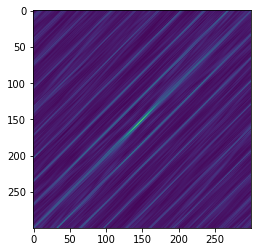

In [13]:
fig = plt.figure()
plt.imshow(abs(img[0,0,:,:]))